In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.io import arff

In [36]:
largeDataSet = './data/raw/KDDTrain.arff'
smallDataSet = './data/raw/KDDTrain_20Percent.arff'

# Loading the .arff data format into a pandas dataframe
data, meta = arff.loadarff(smallDataSet)
df = pd.DataFrame(data)

# Review of the dataset
df.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,b'tcp',b'ftp_data',b'SF',491.0,0.0,b'0',0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,b'normal'
1,0.0,b'udp',b'other',b'SF',146.0,0.0,b'0',0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,b'normal'
2,0.0,b'tcp',b'private',b'S0',0.0,0.0,b'0',0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.0,1.0,1.0,0.00,0.0,b'anomaly'


In [37]:
# Dataset summary
df.info()
# Also need to list the number of categorical and numerical values feature numbers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  float64
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  float64
 5   dst_bytes                    25192 non-null  float64
 6   land                         25192 non-null  object 
 7   wrong_fragment               25192 non-null  float64
 8   urgent                       25192 non-null  float64
 9   hot                          25192 non-null  float64
 10  num_failed_logins            25192 non-null  float64
 11  logged_in                    25192 non-null  object 
 12  num_compromised              25192 non-null  float64
 13  root_shell      

### Data Cleaing : Handling & Imputing Missing Values

In this stage we're ensuring there's no missing / null values in the datset.

In [38]:
# Manually Checking if data include missing values
missingValues = df.isnull().sum()
print(f"Missing Values in every Column: \n{missingValues}")

Missing Values in every Column: 
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_r

In [39]:
# Checking Anomolies in the dataset
print(f"Descriptive Statistics: \n{df.describe(include='all')}")


Descriptive Statistics: 
            duration protocol_type  service   flag     src_bytes  \
count   25192.000000         25192    25192  25192  2.519200e+04   
unique           NaN             3       66     11           NaN   
top              NaN        b'tcp'  b'http'  b'SF'           NaN   
freq             NaN         20526     8003  14973           NaN   
mean      305.054104           NaN      NaN    NaN  2.433063e+04   
std      2686.555640           NaN      NaN    NaN  2.410805e+06   
min         0.000000           NaN      NaN    NaN  0.000000e+00   
25%         0.000000           NaN      NaN    NaN  0.000000e+00   
50%         0.000000           NaN      NaN    NaN  4.400000e+01   
75%         0.000000           NaN      NaN    NaN  2.790000e+02   
max     42862.000000           NaN      NaN    NaN  3.817091e+08   

           dst_bytes   land  wrong_fragment       urgent           hot  ...  \
count   2.519200e+04  25192    25192.000000  25192.00000  25192.000000  ...   


Since there's no missing values in the dataset, we don't need to handle/ impute missing values.
Also, sinse every feature is complete with its values, we don't need to drop any feature.

## Feature Scaling
Since the datavalues are not in the same range, we need to scale them to the same range. We can choose between the two methods: MinMaxScaler and StandardScaler.

For choosing one of them let's first plot the distribution of the values of each feature to check for outliers.

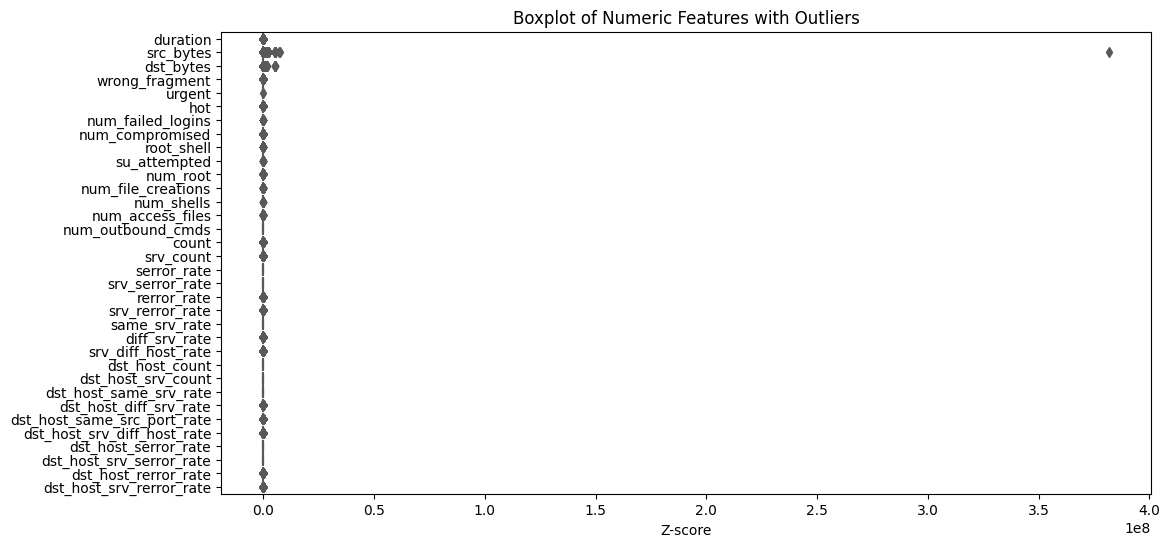

In [40]:
# Select only numeric columns for outlier visualization
numeric_columns = df.select_dtypes(include=['int64','float64'])

# Create a boxplot to visualize outliers using Z-scores
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_columns, orient='h', palette='Set2')
plt.title('Boxplot of Numeric Features with Outliers')
plt.xlabel('Z-score')
plt.show()


In [41]:
from sklearn.preprocessing import MinMaxScaler

# Separate categorical and numeric columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()[:-1]  # Exclude the class column
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# One-hot encode categorical columns
encoded_columns = pd.get_dummies(df[categorical_columns], drop_first=True)

# Scale numeric columns using MinMaxScaler
scaler = MinMaxScaler()
scaled_columns = scaler.fit_transform(df[numeric_columns])


# Convert the scaled numeric columns back to a DataFrame with appropriate column names
scaled_df = pd.DataFrame(scaled_columns, columns=numeric_columns)
# Combine the scaled numeric and encoded categorical features
processed_data = pd.concat([scaled_df, encoded_columns], axis=1)

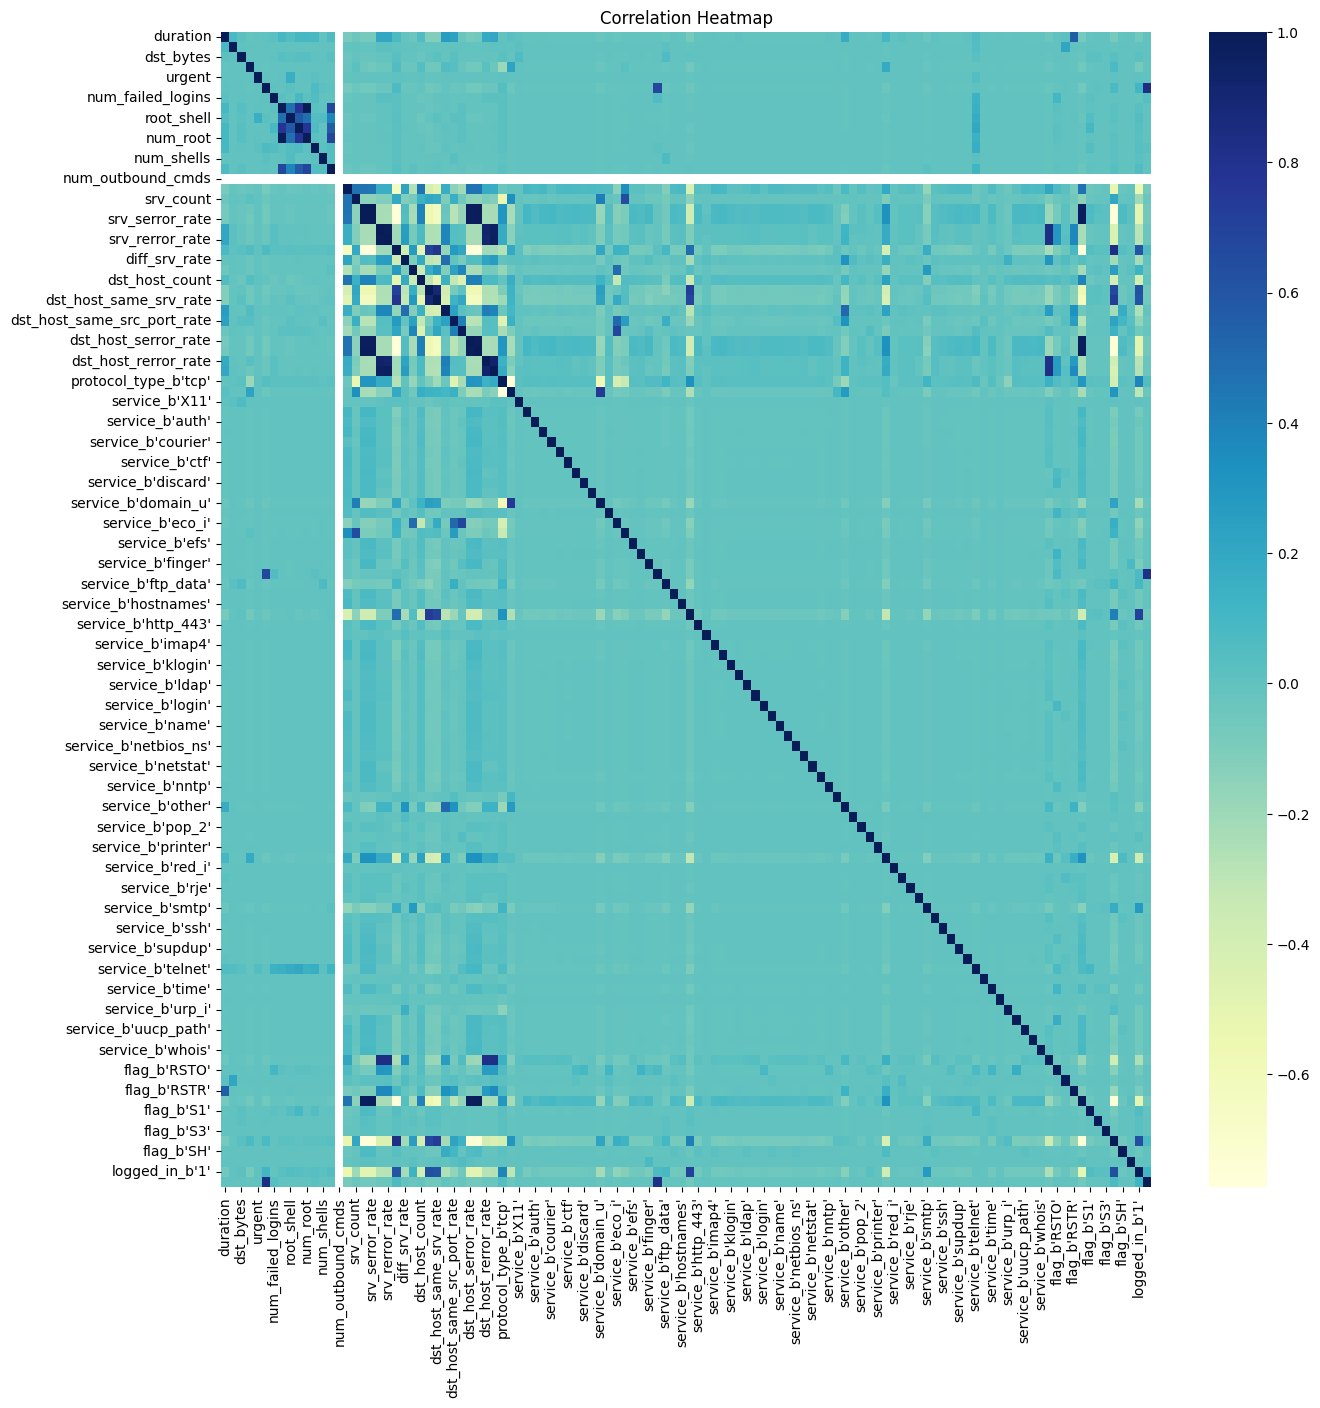

In [42]:
plt.figure(figsize=(15, 15))
sns.heatmap(processed_data.corr(), cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()

# PCA Algorithm for Dimensionality Reduction

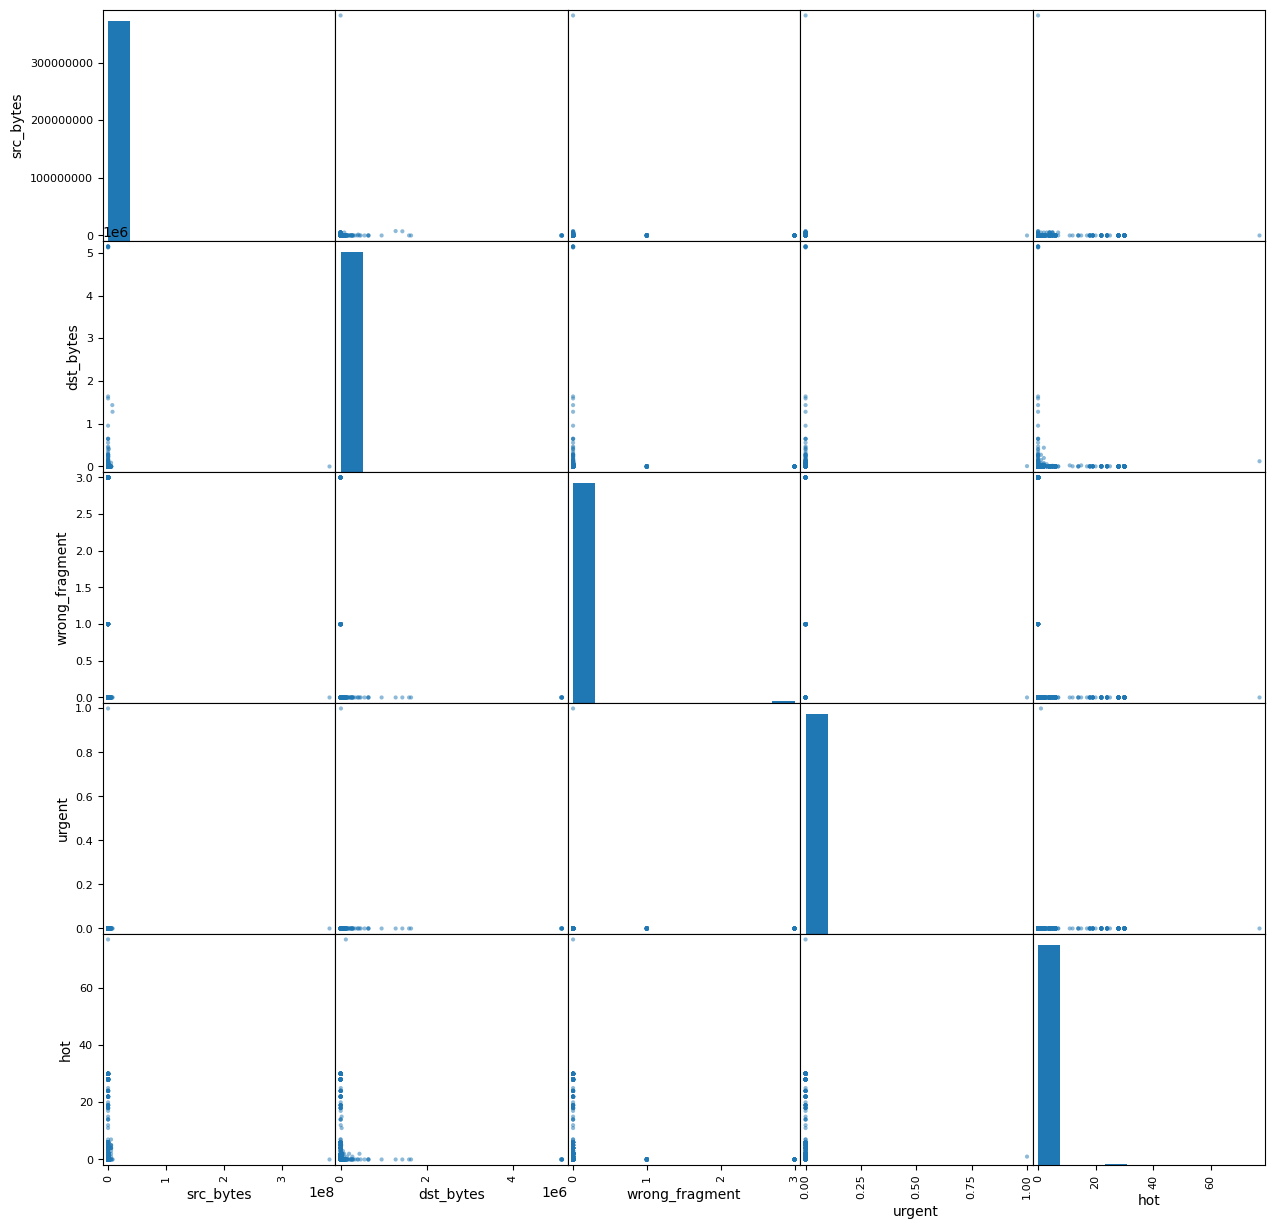

In [43]:
from pandas.plotting import scatter_matrix

# Specify the alpha parameter to control transparency of data points
scatter_matrix(df[["protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "class"]], alpha=0.5, figsize=(15, 15))
plt.show()


/home/mahrjose/bin/BRACU/BRACU-CSE422/Course Project - Network Intrusion Detection using Machine Learning/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


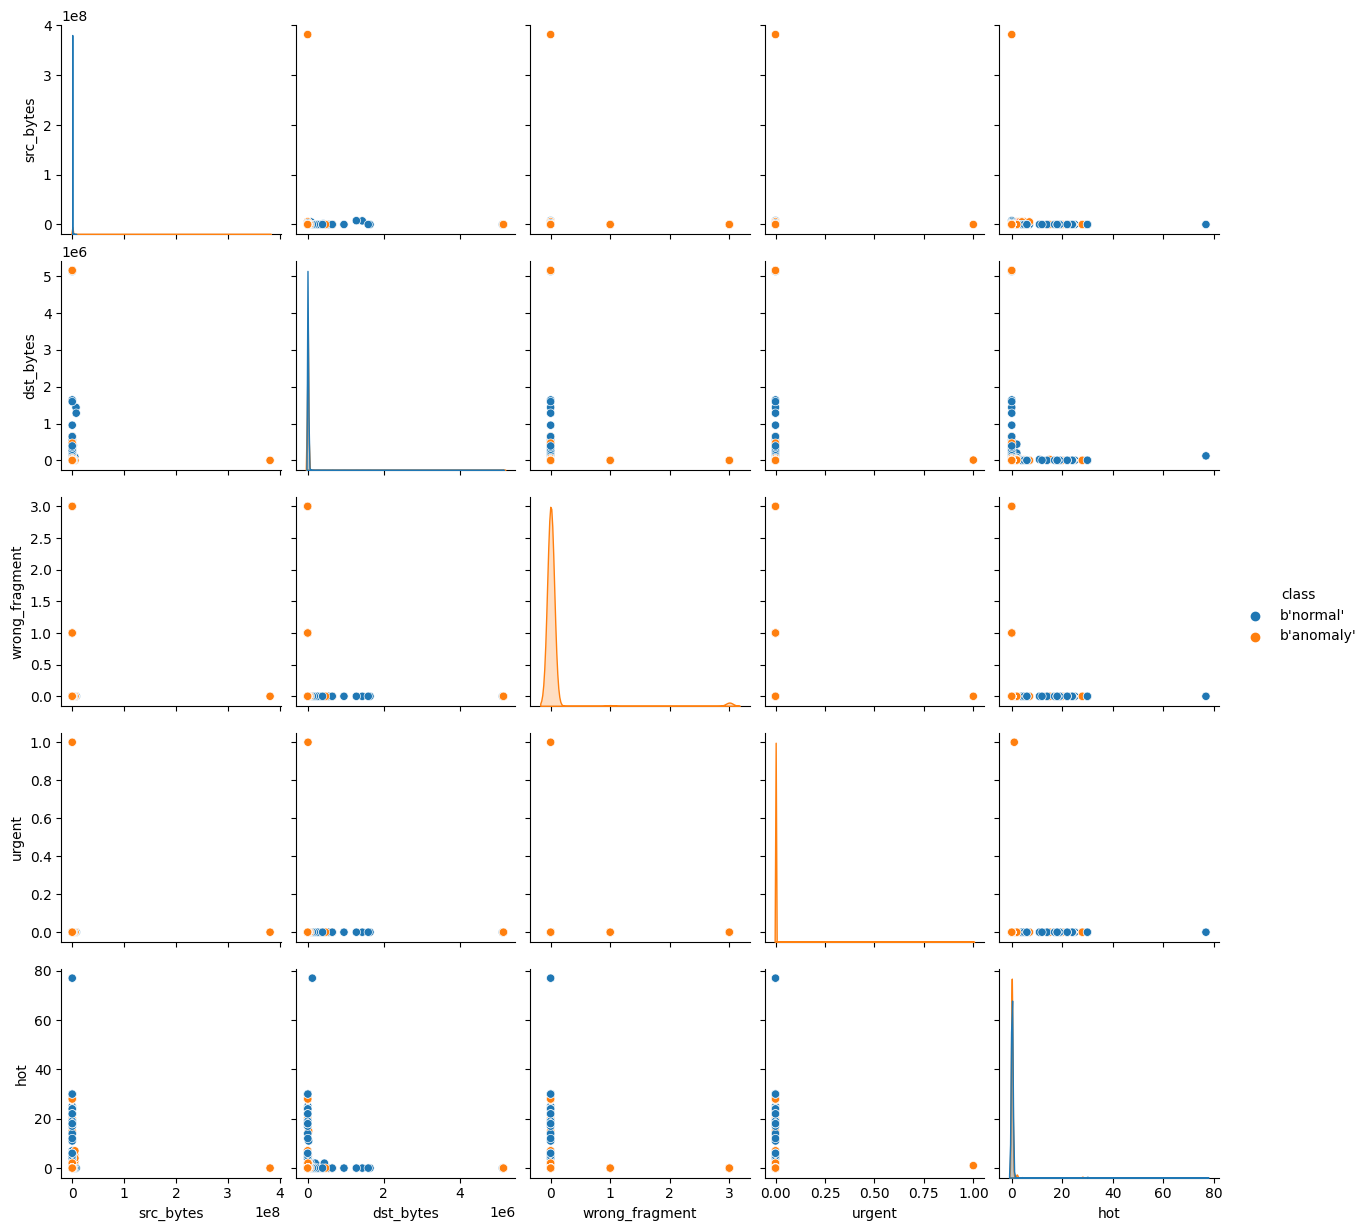

In [44]:
import seaborn as sns

# Create a pair plot with 'hue' parameter for coloring based on the 'class' column
sns.pairplot(df[["protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "class"]], hue='class', diag_kind='kde')
plt.tight_layout()
plt.show()
